Firstly, we need to import all necessary libraries.


#Necessary imports



In [296]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from  sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer


Then, we load the file

In [297]:
df = pd.read_csv("creditCard.csv")
labels  = pd.read_csv("creditCardLabel.csv")


And check the first 5 rows

In [298]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


We can already see that the 1st row will cause trouble for our models, that's why we can proceed with deletion

In [299]:
df_transformation = df.copy()
df_transformation.drop(df.iloc[0].name, inplace=True)
labels.drop(df.iloc[0].name, inplace= True)

Let's investigate unique values of each columns to see if there is any irrelevant information

In [300]:
for i in df.columns:
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}': {unique_values}")


Unique values for column 'Ind_ID': [5008827 5009744 5009746 ... 5115992 5118219 5053790]
Unique values for column 'GENDER': ['M' 'F' nan]
Unique values for column 'Car_Owner': ['Y' 'N']
Unique values for column 'Propert_Owner': ['Y' 'N']
Unique values for column 'CHILDREN': [ 0  1  2  4  3 14]
Unique values for column 'Annual_income': [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    

As we can see, ```["EDUCATION"]``` columns consist of both Academic Degree and Higher Education, it will add unnecesary feature when we'd perform encoding of categorical variables. We should take care of it.

In [301]:
df_transformation[["EDUCATION"]] = df_transformation[["EDUCATION"]].replace("Academic degree", "Higher Education") 

Let's investigate the ```[Car_owner]``` and ```[Propert_Owner]``` columns

In [302]:
uniqVal = pd.concat([df['Car_Owner'], df['Propert_Owner'],]).unique()

print(uniqVal)

['Y' 'N']


As we can see, they are boolean columns, so we should make them boolean instead of string

In [303]:
df_transformation['Car_Owner'] = df['Car_Owner'].map({'Y': 1, 'N': 0})
df_transformation['Propert_Owner'] = df['Propert_Owner'].map({'Y': 1, 'N': 0})


Columns ```[Employed_years]``` and ```[Birthday_count]``` appear to be quite hard to read, let's change that.

In [304]:
# Convert Employed_days to years
df_transformation['Employed_years'] = df_transformation['Employed_days'] / 365

# Convert Birthday_count to years
df_transformation['Age'] = df_transformation['Birthday_count'] / -365

# Round the values to two decimal places
df_transformation['Employed_years'] = df_transformation['Employed_years'].round(2)
df_transformation['Age'] = df_transformation['Age'].round(2)

# Drop the original columns
df_transformation.drop(['Employed_days', 'Birthday_count'], axis=1, inplace=True)




Additionally, we can change ```[Age]``` column further, by rounding, so we can apply methods related to discrete mathematics and not continuous

In [305]:

# Create a new column 'Age Bracket' based on the 'Age' column
df_transformation['Age'].round(2) 


1       37.14
2         NaN
3       37.14
4       37.14
5       37.14
        ...  
1543    32.76
1544    28.02
1545    36.09
1546    41.90
1547    45.48
Name: Age, Length: 1547, dtype: float64

Perhaps, we only need to know if person is employed or not, regardless of the time employed

In [306]:
df_transformation['Is_Employed'] = (df_transformation['Employed_years'] < 0).astype(int)


Becuase column ```[GENDER]``` also consist of letters, I've decided to change the name of the column to ```[isMale]```, and make it binary

In [307]:
# Convert Employed_days to years
df_transformation['isMale'] = df_transformation['GENDER'].apply(lambda x: 1 if x == 'M' else 0)
df_transformation.drop(["GENDER"],axis=1,inplace=True)

In [308]:
df_transformation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
1,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1.61,37.14,1,0
2,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1.61,NaN,1,0
3,5009749,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1.61,37.14,1,0
4,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1.61,37.14,1,0
5,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1.61,37.14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,-5.98,32.76,1,0
1544,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,-3.31,28.02,1,0
1545,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,-6.79,36.09,1,1
1546,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,-1.77,41.90,1,1


We should also make column ```Age``` discrete instead of continious.

In [309]:
df_transformation["Age"] = df_transformation["Age"].round(0)
df_transformation['Employed_years'] = df_transformation['Employed_years'].astype(int)
df_transformation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
1,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1,37.0,1,0
2,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1,NaN,1,0
3,5009749,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1,37.0,1,0
4,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1,37.0,1,0
5,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,-1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,-5,33.0,1,0
1544,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,-3,28.0,1,0
1545,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,-6,36.0,1,1
1546,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,-1,42.0,1,1


According to data source, non-positive value of column ```Employed Days``` indicated the years the person is working. However, it is more logical, that this column should be positive when person is working and negative when not.

In [310]:
df_transformation["Employed_years"] = df_transformation["Employed_years"] * -1


In [311]:
df_transformation_imputation = df_transformation.copy()
df_transformation_imputation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
1,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
2,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1,0
3,5009749,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
4,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
5,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,5,33.0,1,0
1544,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,3,28.0,1,0
1545,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,6,36.0,1,1
1546,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,1,42.0,1,1


One way of managing missing values is by using imputation techniques. For now, we will use ```SimpleImputer``` from ```scikit-learn``` library.

In [312]:
# Import the SimpleImputer class
# Create an instance of SimpleImputer with the "most_frequent" strategy
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")

# Use the imputer to fill missing values in the "Type_Occupation" column
imputer.fit(df_transformation_imputation)
df_transformation_imputation = pd.DataFrame(imputer.transform(df_transformation_imputation))
df_transformation_imputation.columns = df_transformation.columns.tolist()
df_transformation_imputation



,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
0,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
1,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,42.0,1,0
2,5009749,1,0,0,135000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
3,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
4,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5028645,0,1,0,135000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,5,33.0,1,0
1543,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,3,28.0,1,0
1544,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,6,36.0,1,1
1545,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,1,42.0,1,1


Another way of working with missing data is just ignoring it, this will be the next approach.

In [313]:
df_transformation_ignoringNA = df_transformation.copy()
df_transformation_ignoringNA.dropna(inplace= True)
df_transformation_ignoringNA.isna().sum()

Ind_ID             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
Employed_years     0
Age                0
Is_Employed        0
isMale             0
dtype: int64

In [314]:
df_transformation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
1,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
2,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1,0
3,5009749,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
4,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
5,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,5,33.0,1,0
1544,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,3,28.0,1,0
1545,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,6,36.0,1,1
1546,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,1,42.0,1,1


In [315]:
df_transformation_ignoringNA

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
8,5010864,1,1,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1,1
9,5010868,1,1,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,1,Core staff,3,1,50.0,1,1
10,5010869,1,1,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Core staff,1,1,50.0,1,1
11,5018498,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,2,52.0,1,0
13,5018503,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,2,52.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,1,1,1,144000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Accountants,3,8,35.0,1,0
1542,5118268,1,0,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,9,31.0,1,1
1544,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,3,28.0,1,0
1545,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,6,36.0,1,1


In [316]:
df_transformation_imputation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
0,5009744,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
1,5009746,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,42.0,1,0
2,5009749,1,0,0,135000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
3,5009752,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
4,5009753,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Laborers,2,1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5028645,0,1,0,135000.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,5,33.0,1,0
1543,5023655,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,3,28.0,1,0
1544,5115992,1,1,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,6,36.0,1,1
1545,5118219,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,1,42.0,1,1


There is also third approach, we can ignore them and dont delete them from dataset, we will use NaN as another possible value and see if it could enhance our models predictive abilities.
To sum up, currently we have 3 datasets:
* df_tranformation
* df_transformation_imputation
* df_transformation_ignoringNA

What we should do next is changing the categorical variables into numerical, in order to do so we will use LabelEncoding (for now), so the NaN values will also be granted a label, that's one approach we will use

### Visualizations

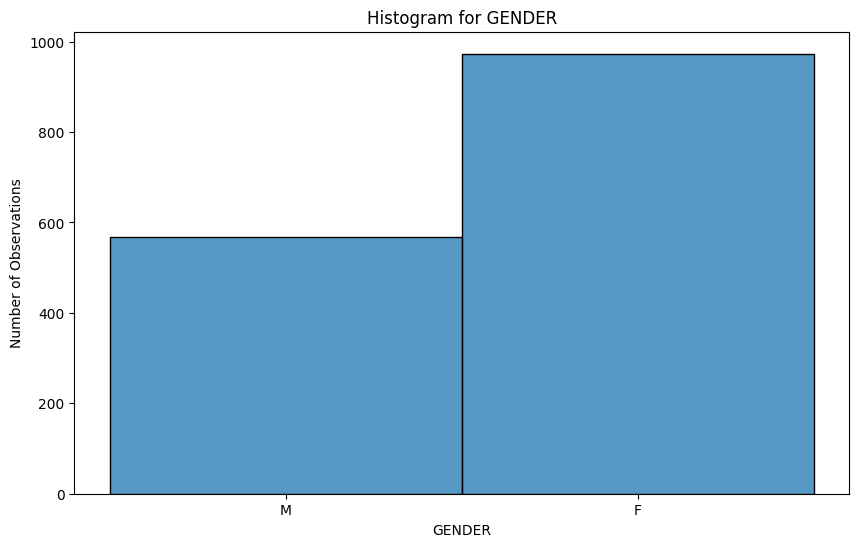

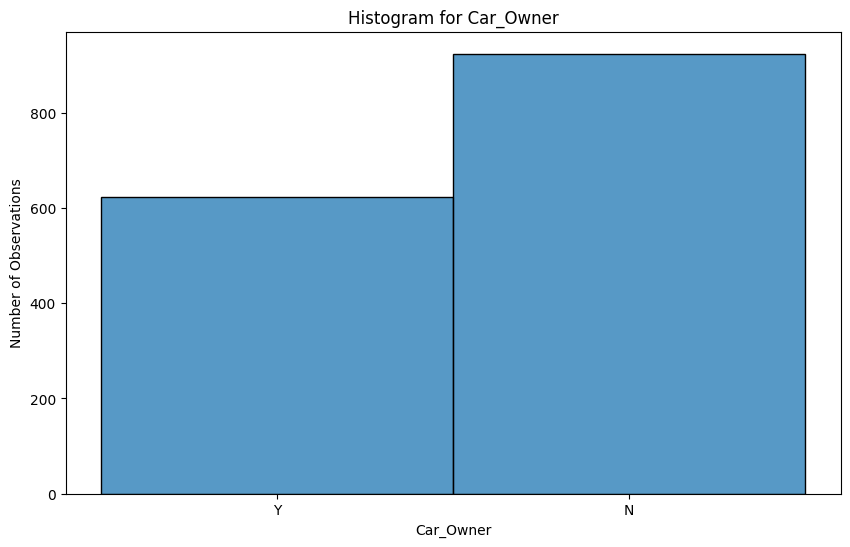

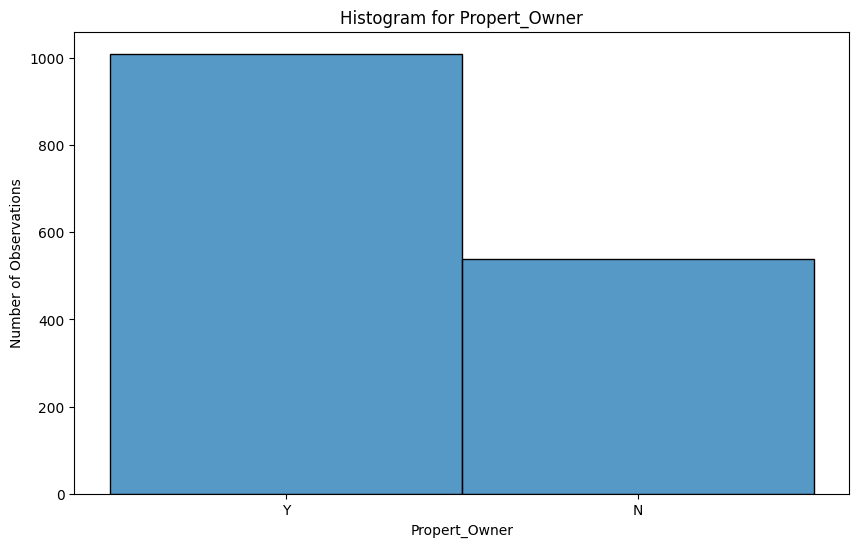

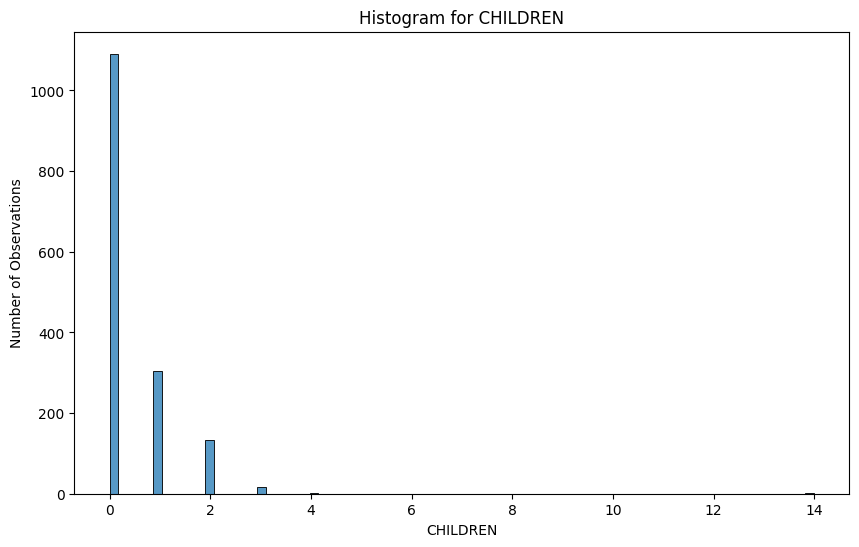

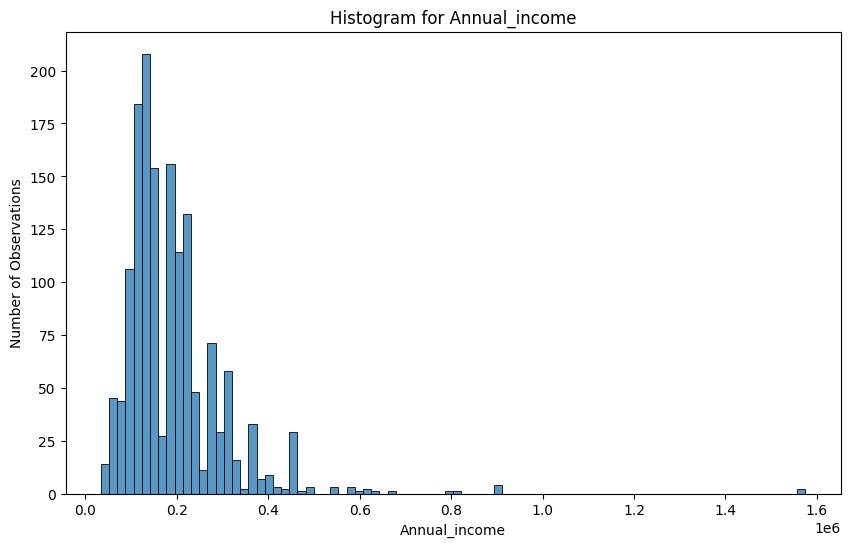

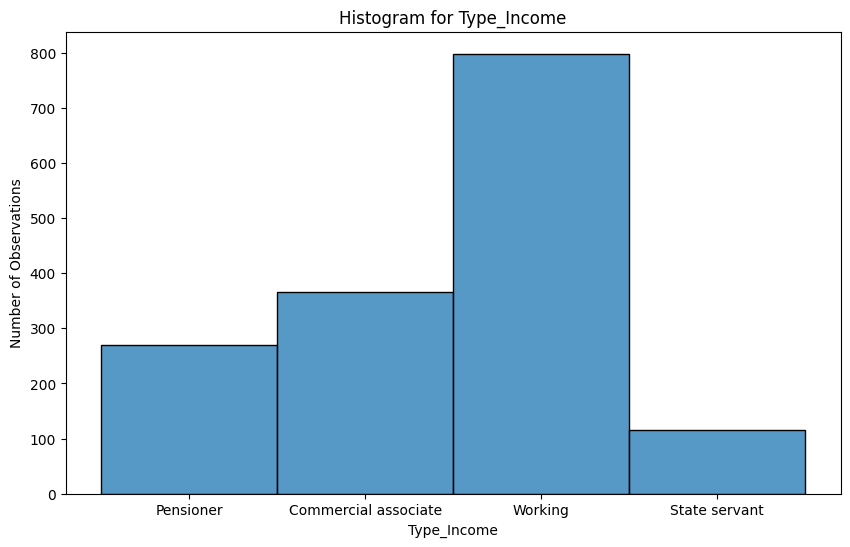

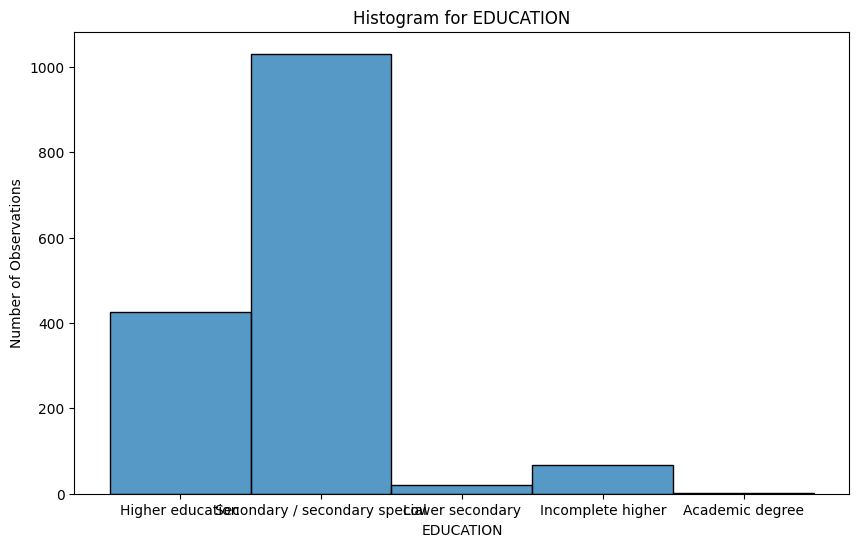

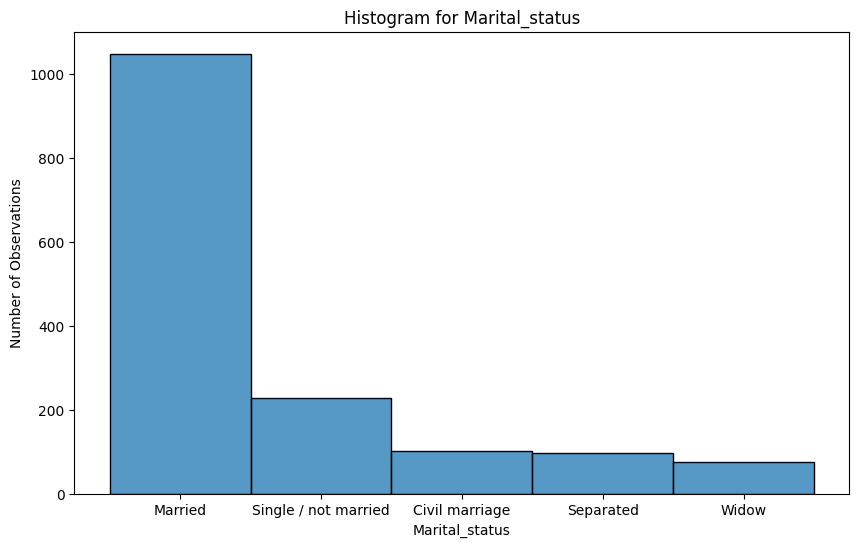

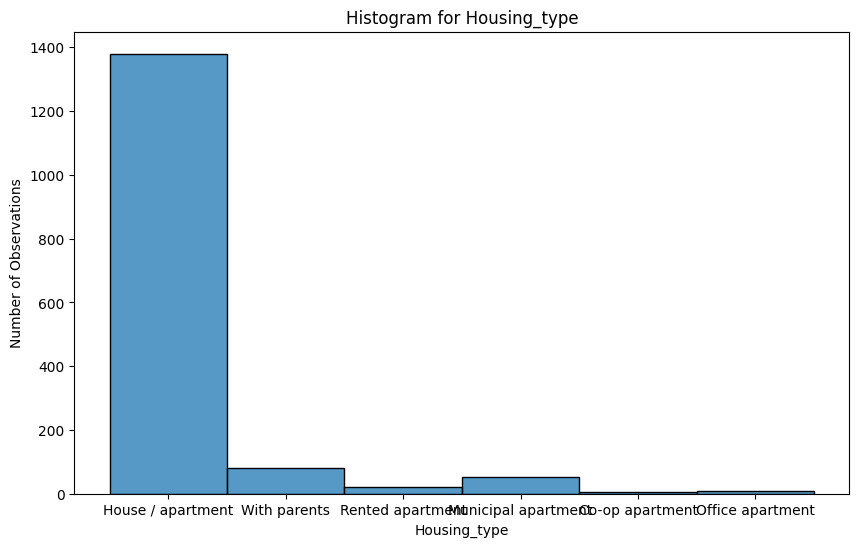

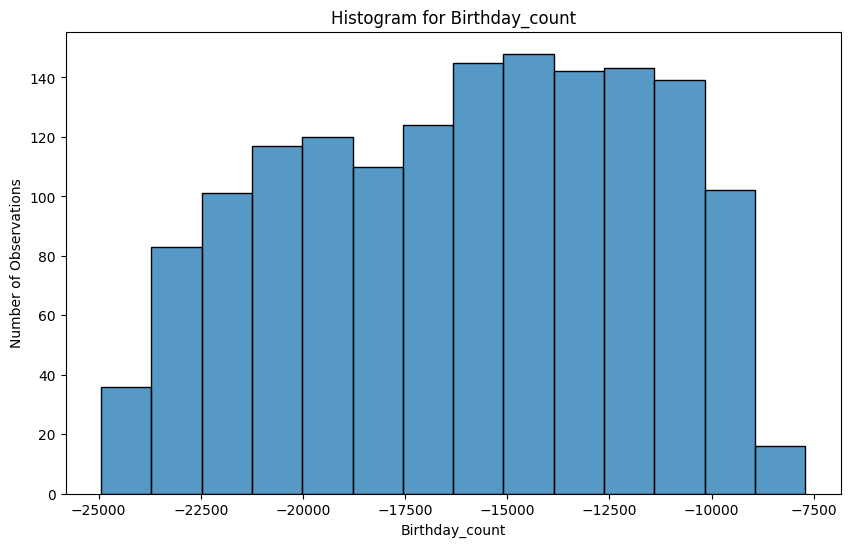

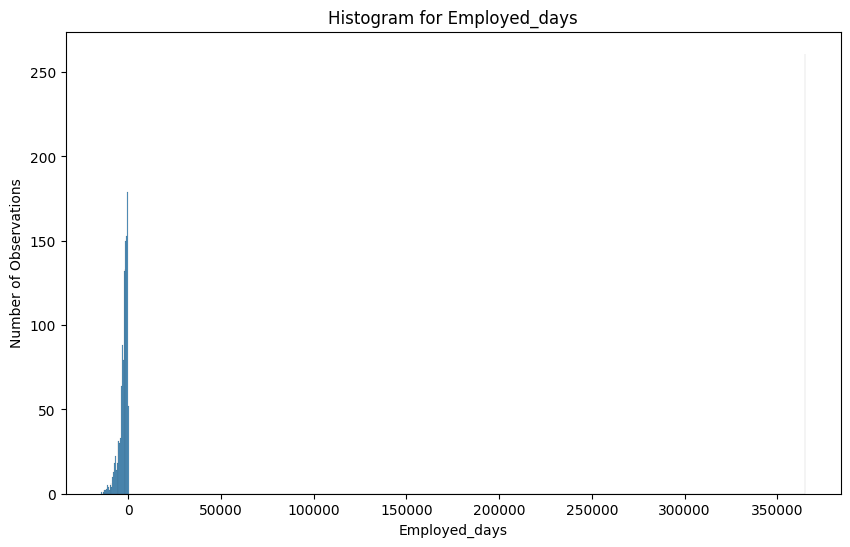

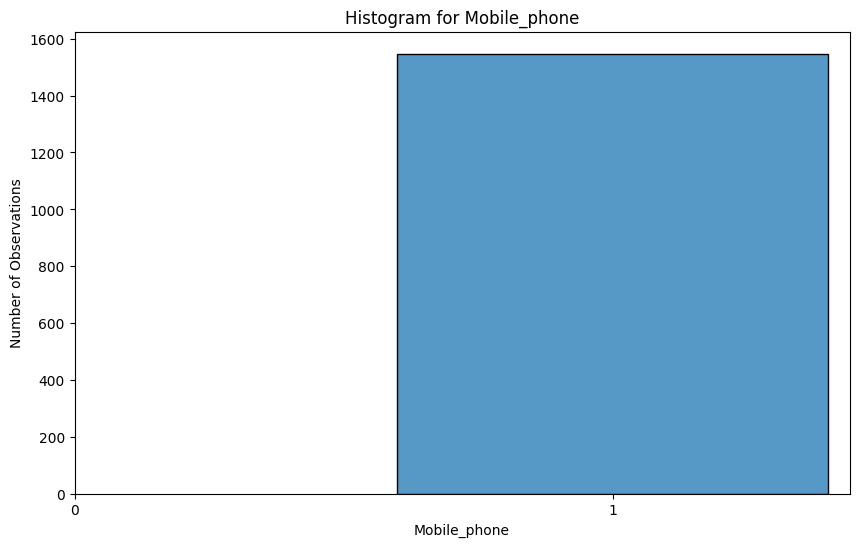

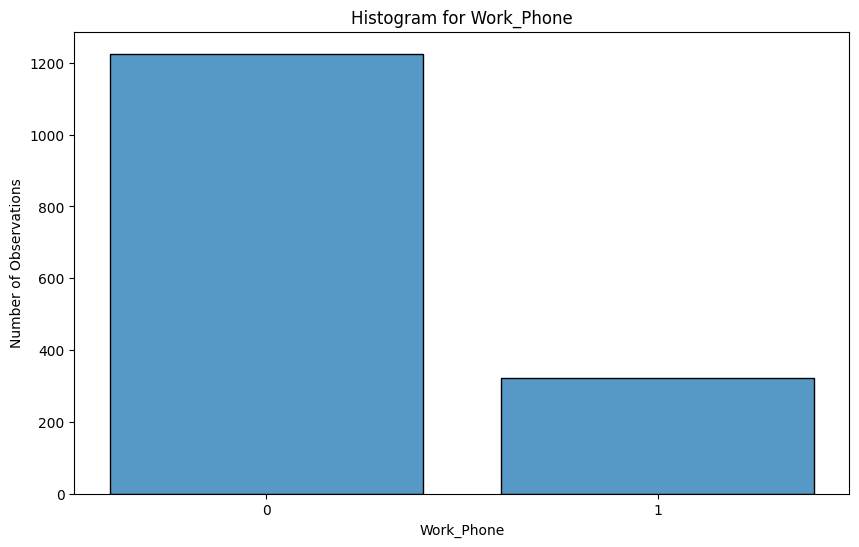

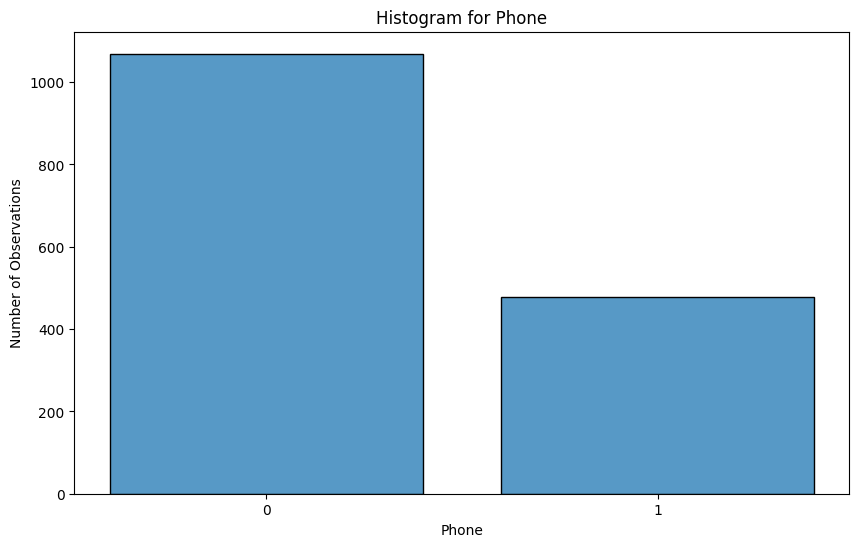

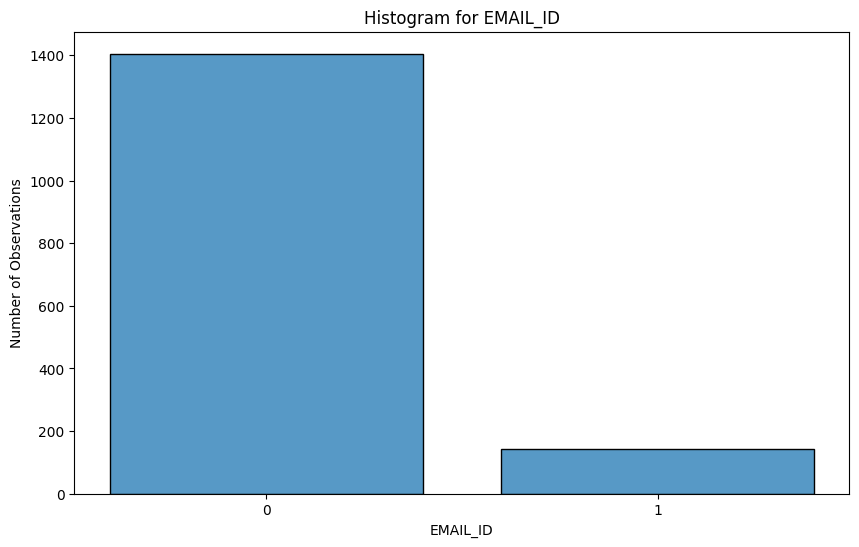

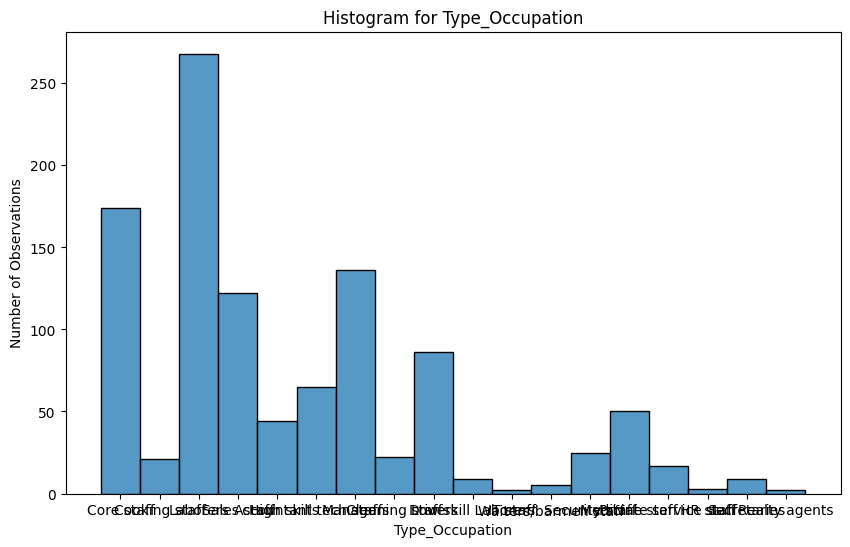

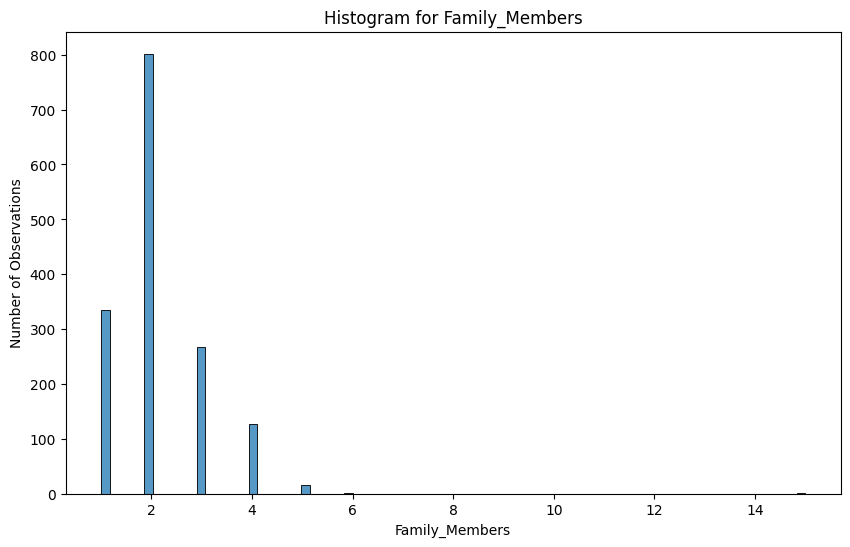

In [317]:
for column in df.columns:
    if column != 'Ind_ID':
        plt.figure(figsize=(10, 6))
        

        if df[column].dropna().isin([0, 1]).all():
     
            sns.histplot(df[column], discrete=True, shrink=0.8)
            plt.xticks([0, 1]) 
        else:
            sns.histplot(df[column], kde=False)
        
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Number of Observations')
        plt.show()


In [318]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()
dfs = [df_transformation,df_transformation_ignoringNA]
# Iterate over each column in the DataFrame
for df in dfs:
    for column in df.columns:
        # Check if the column is of object type (categorical)
        if df[column].dtype == 'object':
            # Use label encoder to transform the column
            df[column] = label_encoder.fit_transform(df[column])



In [319]:
df_transformation_ignoringNA

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
8,5010864,1,1,1,450000.0,0,3,1,1,1,0,1,1,3,3,1,50.0,1,1
9,5010868,1,1,1,450000.0,1,3,1,1,1,0,1,1,3,3,1,50.0,1,1
10,5010869,1,1,1,450000.0,0,3,3,1,1,0,1,1,3,1,1,50.0,1,1
11,5018498,1,1,0,90000.0,3,3,1,1,1,1,1,0,2,2,2,52.0,1,0
13,5018503,1,1,0,90000.0,3,3,1,1,1,1,1,0,2,2,2,52.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,1,1,1,144000.0,3,0,1,1,1,0,0,0,0,3,8,35.0,1,0
1542,5118268,1,0,1,360000.0,2,3,1,1,1,0,1,0,4,3,9,31.0,1,1
1544,5023655,0,0,0,225000.0,0,1,3,1,1,0,0,0,0,1,3,28.0,1,0
1545,5115992,1,1,2,180000.0,3,0,1,1,1,0,0,0,10,4,6,36.0,1,1


In [320]:
df_transformation

,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
1,5009744,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,37.0,1,0
2,5009746,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,NaN,1,0
3,5009749,1,0,0,NaN,0,1,1,1,1,1,1,0,18,2,1,37.0,1,0
4,5009752,1,0,0,315000.0,0,1,1,1,1,1,1,0,18,2,1,37.0,1,0
5,5009753,1,0,0,315000.0,1,1,1,1,1,1,1,0,18,2,1,37.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,1,0,NaN,0,1,1,1,1,0,0,0,10,2,5,33.0,1,0
1544,5023655,0,0,0,225000.0,0,2,3,1,1,0,0,0,0,1,3,28.0,1,0
1545,5115992,1,1,2,180000.0,3,1,1,1,1,0,0,0,10,4,6,36.0,1,1
1546,5118219,1,0,0,270000.0,3,4,0,1,1,1,1,0,4,2,1,42.0,1,1


In [321]:
# Perform label encoding on the specified columns
df_transformation_imputation['Type_Income'] = label_encoder.fit_transform(df_transformation_imputation['Type_Income'])
df_transformation_imputation['EDUCATION'] = label_encoder.fit_transform(df_transformation_imputation['EDUCATION'])
df_transformation_imputation['Marital_status'] = label_encoder.fit_transform(df_transformation_imputation['Marital_status'])
df_transformation_imputation['Housing_type'] = label_encoder.fit_transform(df_transformation_imputation['Housing_type'])
df_transformation_imputation['Type_Occupation'] = label_encoder.fit_transform(df_transformation_imputation['Type_Occupation'])


### Hypothesis testing


Now we can proceed with some hypothesis testing or other statistical test in order to find out something more.

Shapiro-Wilk Test

In [322]:
for column in df_transformation.select_dtypes(include=np.number).columns:
    stat, p = shapiro(df_transformation[column])
    print('Column:', column)
    print('Test Statistic:', stat)
    if(p > 0.05):
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')


Column: Ind_ID
Test Statistic: 0.9490448356105866
Probably not Gaussian
Column: Car_Owner
Test Statistic: 0.6226974818552935
Probably not Gaussian
Column: Propert_Owner
Test Statistic: 0.6019987030301852
Probably not Gaussian
Column: CHILDREN
Test Statistic: 0.5506461588590481
Probably not Gaussian
Column: Annual_income
Test Statistic: nan
Probably not Gaussian
Column: Type_Income
Test Statistic: 0.742107350724974
Probably not Gaussian
Column: EDUCATION
Test Statistic: 0.6185074818915145
Probably not Gaussian
Column: Marital_status
Test Statistic: 0.7105914736188281
Probably not Gaussian
Column: Housing_type
Test Statistic: 0.33994336455900376
Probably not Gaussian
Column: Mobile_phone
Test Statistic: 1.0
Probably Gaussian
Column: Work_Phone
Test Statistic: 0.4986439868343323
Probably not Gaussian
Column: Phone
Test Statistic: 0.581621744266775
Probably not Gaussian
Column: EMAIL_ID
Test Statistic: 0.3269528126775406
Probably not Gaussian
Column: Type_Occupation
Test Statistic: 0.88020

/var/data/python/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


### MODEL 1 - DecisionTree Imputation


In [323]:
df_transformation_imputation.head()


,Ind_ID,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Employed_years,Age,Is_Employed,isMale
0,5009744,1,0,0,315000.0,0,1,1,1,1,1,1,0,8,2,1,37.0,1,0
1,5009746,1,0,0,315000.0,0,1,1,1,1,1,1,0,8,2,1,42.0,1,0
2,5009749,1,0,0,135000.0,0,1,1,1,1,1,1,0,8,2,1,37.0,1,0
3,5009752,1,0,0,315000.0,0,1,1,1,1,1,1,0,8,2,1,37.0,1,0
4,5009753,1,0,0,315000.0,1,1,1,1,1,1,1,0,8,2,1,37.0,1,0


In [324]:
labels.drop("Ind_ID", axis =1 ,inplace = True)
labels

,label
1,1
2,1
3,1
4,1
5,1
...,...
1543,0
1544,0
1545,0
1546,0


In [325]:
decTreeImputation = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(
     df_transformation_imputation.drop(columns=['Ind_ID']), labels, test_size=0.33, random_state=42)

decTreeImputation.fit(X_train, y_train)
decTreeImputation.score(X_test, y_test)


0.8277886497064579

In [326]:
y_pred = decTreeImputation.predict(X_test)

In [327]:
report_raw = classification_report(y_test, y_pred)
report_table_raw = pd.DataFrame([x.split() for x in report_raw.split('\n')[2:-5]], columns=['class', 'precision', 'recall', 'f1-score', 'support'])
print(report_table_raw)


  class precision recall f1-score support
0     0      0.94   0.86     0.90     465
1     1      0.25   0.46     0.32      46


In [335]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [336]:
model1_ignored_na_grid = GridSearchCV(decTreeImputation, param_grid, cv=5, n_jobs=-1)
model1_ignored_na_grid.fit(X_train, y_train)
best_paramsDecTree = model1_ignored_na_grid.best_params_

In [337]:
decTreeImputationBestParams = DecisionTreeClassifier(**best_paramsDecTree)
decTreeImputationBestParams.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10)

In [340]:
decTreeImputationBestParams.score(X_test, y_test)
report_GSCV = classification_report(y_test, decTreeImputationBestParams.predict(X_test))
report_table_GSCV = pd.DataFrame([x.split() for x in report_GSCV.split('\n')[2:-5]], columns=['class', 'precision', 'recall', 'f1-score', 'support'])
print(report_GSCV)


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       465
           1       0.43      0.07      0.11        46

    accuracy                           0.91       511
   macro avg       0.67      0.53      0.53       511
weighted avg       0.87      0.91      0.88       511



In [341]:
report_table_GSCV

,class,precision,recall,f1-score,support
0,0,0.91,0.99,0.95,465
1,1,0.43,0.07,0.11,46


In [349]:
zero_labels = labels[labels['label'] == 0]
percentage = (labels[labels['label'] == 0].shape[0] / labels.shape[0]) * 100
percentage

88.75242404654169